## Gaussian Process Tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use("bmh")
sys.path.append("../src/")
from kernels import ExponentiatedQuadraticKernel
from gaussian_process import GaussianProcess

RUNNING THE L-BFGS-B CODE

           * * *

[1. 1.] 1.000001
Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26475D+01    |proj g|=  7.29555D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   7.296D+00   1.265D+01
  F =   12.647524996201442     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


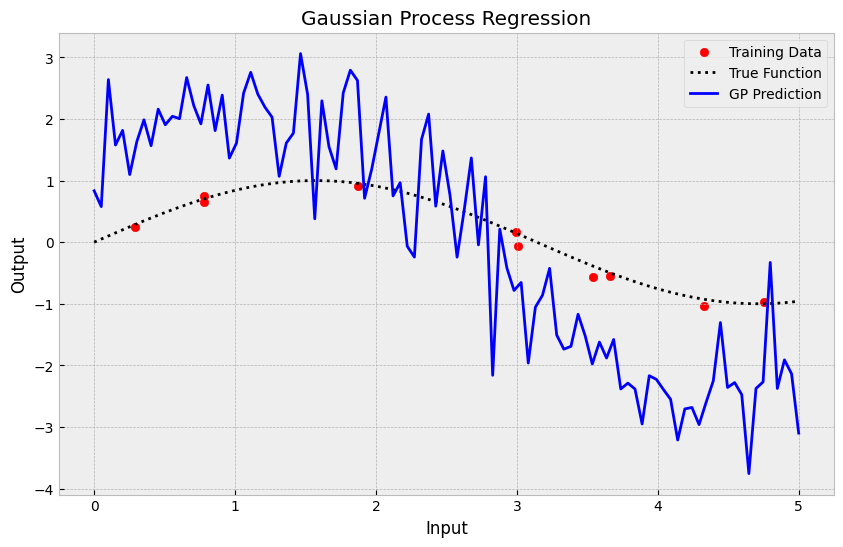

In [2]:
true_function = lambda x: np.sin(x).flatten()
# Generate synthetic data
np.random.seed(42)
X_train = np.sort(5 * np.random.rand(10))[:, np.newaxis]
y_train = true_function(X_train).ravel() + 0.1 * np.random.randn(10)

# Initialize GaussianProcess
gp = GaussianProcess(mean_function=true_function, kernel_k=ExponentiatedQuadraticKernel(), T=X_train, Y=y_train)

# Test points
X_test = np.linspace(0, 5, 100)[:, np.newaxis]

# Predict
y_pred = gp.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='red', marker='o', label='Training Data')
plt.plot(X_test, true_function(X_test), 'k:', label='True Function')
plt.plot(X_test, y_pred, 'b-', label='GP Prediction')
#plt.fill_between(X_test.ravel(), y_pred - 1.96 * np.sqrt(np.diag(gp.C)), y_pred + 1.96 * np.sqrt(np.diag(gp.C)),
                 #alpha=0.2, color='blue', label='95% Confidence Interval')
plt.title('Gaussian Process Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(T_train, Y_train, c='red', label='Training Data')
plt.plot(T_test, Y_pred_mean, label='Mean Prediction', color='blue')
plt.fill_between(T_test.ravel(), Y_pred_mean - np.sqrt(np.diag(Y_pred_covariance)),
                 Y_pred_mean + np.sqrt(np.diag(Y_pred_covariance)), color='blue', alpha=0.2, label='Confidence Interval')
plt.title('Gaussian Process Regression')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

NameError: name 'T_train' is not defined

<Figure size 1000x600 with 0 Axes>